## IMPORTING LIBRIES

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
## splitting dataset
from sklearn.model_selection import train_test_split

In [6]:
## load regression model
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

## LOADING AND COPYIND DATA

In [8]:
data =pd.read_csv('dataset/car_price_prediction.csv')

In [9]:
newdata = data.copy()


## DATA PREVIEW AND 

In [10]:
newdata

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [11]:
newdata.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
## check  the number of rows and columns
print(f' Total number of rows: {newdata.shape[0]} -> Total number of columns: {newdata.shape[0]}')

 Total number of rows: 19237 -> Total number of columns: 19237


In [13]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [14]:
## checking for missing values
newdata.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [15]:
## checking for duplicated values
newdata.duplicated().sum()

313

In [16]:
## looking for uniques instances in the columns
print(np.unique(newdata['Price']))



[       1        3        6 ...   627220   872946 26307500]


In [17]:
print(np.unique(newdata['Levy']))

['-' '1011' '1016' '1017' '1018' '1024' '1028' '1030' '1031' '1032' '1036'
 '1039' '1045' '1047' '1051' '1053' '1054' '1055' '1058' '1062' '1064'
 '1076' '1077' '1079' '1080' '1083' '1086' '1090' '1091' '1094' '1095'
 '1099' '1103' '1104' '1107' '1108' '1109' '1110' '1111' '1113' '1118'
 '1132' '1138' '1141' '1148' '115' '1156' '1163' '11706' '1171' '11714'
 '1172' '1174' '1176' '1178' '1185' '1187' '1190' '1194' '1195' '1197'
 '1198' '1202' '1203' '1205' '1211' '1228' '1234' '1236' '1246' '1249'
 '1252' '1266' '1267' '1268' '1272' '1273' '1275' '1277' '1279' '1282'
 '1285' '1286' '1288' '1292' '1296' '1297' '1301' '1304' '1307' '1308'
 '1317' '1323' '1324' '1325' '1327' '1341' '1342' '1345' '1346' '1347'
 '1356' '1357' '1360' '1361' '1363' '1365' '1366' '1368' '1369' '1375'
 '1384' '1387' '1391' '1399' '1405' '1408' '1411' '1413' '1426' '1436'
 '1437' '1438' '1440' '1441' '1442' '1451' '1452' '1466' '1468' '1470'
 '1473' '1474' '1481' '1482' '1486' '1488' '1493' '1502' '1503' '1505'
 

In [18]:
print(np.unique(newdata['Manufacturer']))

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'CITROEN' 'DAEWOO' 'DAIHATSU' 'DODGE'
 'FERRARI' 'FIAT' 'FORD' 'GAZ' 'GMC' 'GREATWALL' 'HAVAL' 'HONDA' 'HUMMER'
 'HYUNDAI' 'INFINITI' 'ISUZU' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LANCIA'
 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ'
 'MERCURY' 'MINI' 'MITSUBISHI' 'MOSKVICH' 'NISSAN' 'OPEL' 'PEUGEOT'
 'PONTIAC' 'PORSCHE' 'RENAULT' 'ROLLS-ROYCE' 'ROVER' 'SAAB' 'SATURN'
 'SCION' 'SEAT' 'SKODA' 'SSANGYONG' 'SUBARU' 'SUZUKI' 'TESLA' 'TOYOTA'
 'UAZ' 'VAZ' 'VOLKSWAGEN' 'VOLVO' 'ZAZ' 'სხვა']


In [19]:
print(np.unique(newdata['Model']))
##Category	Leather interior	Fuel type	Engine volume	Mileage	Cylinders	Gear box type	Drive wheels	Doors	Wheel	Color	Airbags

['09-Mar' '100' '100 NX' ... 'macan S' 'tC' 'xD']


In [20]:
print(np.unique(newdata['Prod. year']))

[1939 1943 1947 1953 1957 1964 1965 1968 1973 1974 1976 1977 1978 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [21]:
print(np.unique(newdata['Category']))

['Cabriolet' 'Coupe' 'Goods wagon' 'Hatchback' 'Jeep' 'Limousine'
 'Microbus' 'Minivan' 'Pickup' 'Sedan' 'Universal']


In [22]:
print(np.unique(newdata['Leather interior']))

['No' 'Yes']


In [23]:
print(np.unique(newdata['Fuel type']))

['CNG' 'Diesel' 'Hybrid' 'Hydrogen' 'LPG' 'Petrol' 'Plug-in Hybrid']


In [24]:
print(np.unique(newdata['Engine volume']))

['0' '0.1' '0.2' '0.2 Turbo' '0.3' '0.3 Turbo' '0.4' '0.4 Turbo' '0.5'
 '0.6' '0.6 Turbo' '0.7' '0.7 Turbo' '0.8' '0.8 Turbo' '0.9' '1'
 '1.0 Turbo' '1.1' '1.1 Turbo' '1.2' '1.2 Turbo' '1.3' '1.3 Turbo' '1.4'
 '1.4 Turbo' '1.5' '1.5 Turbo' '1.6' '1.6 Turbo' '1.7' '1.7 Turbo' '1.8'
 '1.8 Turbo' '1.9' '1.9 Turbo' '2' '2.0 Turbo' '2.1' '2.1 Turbo' '2.2'
 '2.2 Turbo' '2.3' '2.3 Turbo' '2.4' '2.4 Turbo' '2.5' '2.5 Turbo' '2.6'
 '2.7' '2.7 Turbo' '2.8' '2.8 Turbo' '2.9' '2.9 Turbo' '20' '3'
 '3.0 Turbo' '3.1' '3.2' '3.2 Turbo' '3.3' '3.4' '3.5' '3.5 Turbo' '3.6'
 '3.6 Turbo' '3.7' '3.7 Turbo' '3.8' '3.9' '4' '4.0 Turbo' '4.2'
 '4.2 Turbo' '4.3' '4.4' '4.4 Turbo' '4.5' '4.5 Turbo' '4.6' '4.6 Turbo'
 '4.7' '4.7 Turbo' '4.8' '4.8 Turbo' '5' '5.0 Turbo' '5.2' '5.3' '5.4'
 '5.4 Turbo' '5.5' '5.5 Turbo' '5.6' '5.7' '5.7 Turbo' '5.8' '5.9' '6'
 '6.2' '6.3' '6.3 Turbo' '6.4' '6.7' '6.8' '7.3']


In [25]:
print(np.unique(newdata['Mileage']))

['0 km' '1000 km' '10000 km' ... '99999 km' '999999 km' '999999999 km']


In [26]:
print(np.unique(newdata['Cylinders']))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 12. 14. 16.]


In [27]:
print(np.unique(newdata['Gear box type']))

['Automatic' 'Manual' 'Tiptronic' 'Variator']


In [28]:
print(np.unique(newdata['Doors']))

['02-Mar' '04-May' '>5']


In [29]:
print(np.unique(newdata['Wheel']))

['Left wheel' 'Right-hand drive']


In [30]:
print(np.unique(newdata['Color']))

['Beige' 'Black' 'Blue' 'Brown' 'Carnelian red' 'Golden' 'Green' 'Grey'
 'Orange' 'Pink' 'Purple' 'Red' 'Silver' 'Sky blue' 'White' 'Yellow']


In [31]:
print(np.unique(newdata['Airbags']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [32]:
newdata2=pd.read_csv('dataset/car_price_prediction.csv', na_values=('-'))

In [33]:
newdata2.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

## DATA PREPROCESSING
. replacing unusual characters with NaN values
.Normilizing columns names
.remove km from mileage column
.filling of missing 

In [34]:
newdata2['Levy'] = newdata2['Levy'].replace('-',np.nan)

In [35]:
newdata2.drop('ID', axis=1, inplace=True)


In [36]:
newdata2.columns[0].lower().replace(' ','-')

'price'

In [37]:
strings_column_names = list(newdata2.dtypes[newdata2.dtypes=='object'].index)
for col in strings_column_names:
    newdata2[col] = newdata2[col].str.lower().str.replace(' ','-')
strings_column_names

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [38]:
newdata2.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [39]:
newdata2['Mileage'] = newdata2['Mileage'].str.replace(' Km', '')

In [40]:
newdata2['Levy'].isnull().sum()

5819

In [41]:
newdata2['Levy'] = newdata2['Levy'].astype('float')

In [42]:
newdata2['Levy'] = newdata2['Levy'].fillna(newdata2['Levy'].mean())

In [43]:
newdata2['Levy'].isnull().sum()

0

## STARTING EDA EXPLORATORY DATA ANALYSIS

In [44]:
## Statistical summary
newdata2.describe().round()

,Price,Levy,Prod. year,Cylinders,Airbags
count,19237.0,19237.0,19237.0,19237.0,19237.0
mean,18556.0,907.0,2011.0,5.0,7.0
std,190581.0,386.0,6.0,1.0,4.0
min,1.0,87.0,1939.0,1.0,0.0
25%,5331.0,730.0,2009.0,4.0,4.0
50%,13172.0,907.0,2012.0,4.0,6.0
75%,22075.0,917.0,2015.0,4.0,12.0
max,26307500.0,11714.0,2020.0,16.0,16.0


## TARGET VARIABLE ANALYSIS

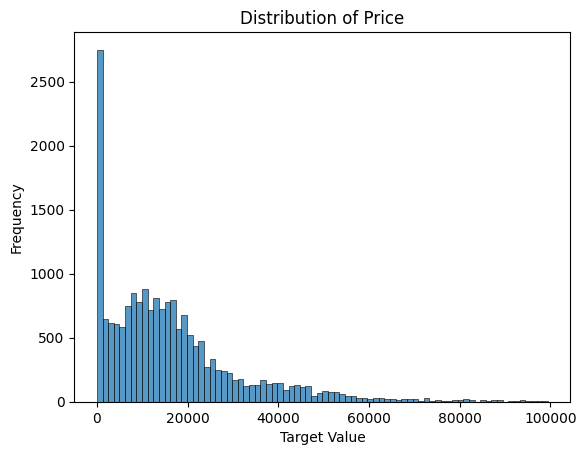

In [45]:
sns.histplot(newdata2['Price'] [newdata2['Price'] <100000])
plt.title('Distribution of Price')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()


## log transformation


In [46]:
log_price = np.log1p(newdata2['Price'])

<Axes: xlabel='Price', ylabel='Count'>

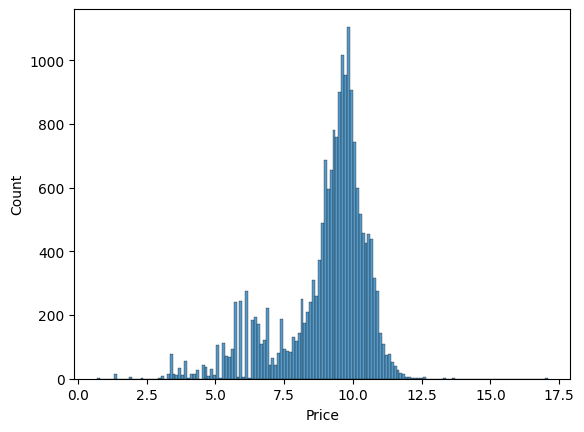

In [47]:
sns.histplot(log_price)

## Building A Validation Framework/Splitting Dataset
.Trainning set 60%
.Validation dataset 20%
.Test dataset 20%

In [48]:
newdata2_train_full, newdata2_test = train_test_split(newdata2,test_size=0.2, random_state=11)
newdata2_train, newdata2_valid = train_test_split(newdata2_train_full, test_size=0.25, random_state=11)

print(f'Train set {len(newdata2_train)}')
print(f'Valid set {len(newdata2_valid)}')
print(f'Test set {len(newdata2_test)}')

Train set 11541
Valid set 3848
Test set 3848


## Train A Baseline Regression Model

In [49]:
## selecting the target column
y_train = newdata2_train['Price'].values
y_valid = newdata2_valid['Price'].values
y_test = newdata2_test['Price'].values
y_train_full = newdata2_train_full['Price'].values

In [50]:
del newdata2_train['Price']
del newdata2_valid['Price']
del newdata2_test['Price']
del newdata2_train_full['Price']

## Train a baseline Regression Model
-Selecting baseline features

In [51]:
baseline_features= ['Levy', 'Prod. year', 'Cylinders', 'Airbags']

newdata2_train_bl =newdata2_train[baseline_features]

In [52]:
newdata2_train_bl

,Levy,Prod. year,Cylinders,Airbags
18929,1268.000000,2012,4.0,2
7985,585.000000,2013,4.0,9
5374,640.000000,2013,4.0,4
2925,562.000000,2015,4.0,12
16823,769.000000,2011,4.0,2
...,...,...,...,...
4825,906.838128,1996,4.0,2
4451,906.838128,2002,4.0,2
17744,562.000000,2015,4.0,10
17747,919.000000,2012,6.0,12


In [53]:
X_train_bl= newdata2_train_bl.values
X_train_bl

array([[1.268e+03, 2.012e+03, 4.000e+00, 2.000e+00],
       [5.850e+02, 2.013e+03, 4.000e+00, 9.000e+00],
       [6.400e+02, 2.013e+03, 4.000e+00, 4.000e+00],
       ...,
       [5.620e+02, 2.015e+03, 4.000e+00, 1.000e+01],
       [9.190e+02, 2.012e+03, 6.000e+00, 1.200e+01],
       [1.807e+03, 2.012e+03, 8.000e+00, 1.200e+01]])

In [54]:
## let train the model
model = LinearRegression()
model.fit(X_train_bl, y_train)

LinearRegression()

In [55]:
y_test

array([29075,   157,  3293, ...,  1646, 15053,  6800], dtype=int64)

## Model Evaluation

In [56]:
# enerate the validation predictions
# Compare the validation predictions to the actual predictions
# Return an accuracy score

In [57]:
## generate validation baseline features
newdata2_valid_bl= newdata2_valid[baseline_features]

In [58]:
## convert baseline into numpy array
X_valid_bl = newdata2_valid_bl.values

In [59]:
X_valid_bl

array([[ 906.83812789, 2008.        ,    4.        ,    4.        ],
       [ 906.83812789, 2012.        ,    8.        ,    8.        ],
       [ 640.        , 2013.        ,    4.        ,    4.        ],
       ...,
       [1537.        , 2009.        ,    6.        ,   12.        ],
       [ 784.        , 2017.        ,    4.        ,    4.        ],
       [ 906.83812789, 1999.        ,    6.        ,    6.        ]])

In [60]:
## generate our validation predictions
y_valid_pred = model.predict(X_valid_bl)

In [61]:
y_valid_pred

array([20444.38291514, 23627.60681212, 21700.23230651, ...,
       16343.58956705, 23424.43185919, 18091.51867411])

## performing a mean squred error

In [62]:
rmse= root_mean_squared_error(y_valid_pred, y_valid)

In [63]:
print(f'Mean Accurate for the Model:{rmse}')

Mean Accurate for the Model:18192.124127277126


## Training Final Model

In [64]:
newdata2_train_final = newdata2_train_full[baseline_features]
X_train_full = newdata2_train_final.values

In [65]:
newdata2_test_final = newdata2_test[baseline_features]
X_test =newdata2_test_final.values

In [66]:
final_model=LinearRegression()
final_model.fit(X_train_full, y_train_full)

LinearRegression()

In [67]:
y_test_predict= final_model.predict(X_test)

In [70]:
rmse=root_mean_squared_error(y_test, y_test_predict)
print(f'Final Model Accuracy: {rmse}')

Final Model Accuracy: 17764.983382682087
